In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
#Next line helps with rendering plots
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
import seaborn as sns #a fancy plotting package
mpl.rcParams['figure.dpi'] = 400 #high res figures

Load data

In [2]:
df = pd.read_csv('../../Data/Chapter_1_cleaned_data.csv')

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


# Examining the Relationships between Features and the Response

In [4]:
features_response = df.columns.tolist()

In [5]:
features_response[:5]

['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE']

In [6]:
features_response[-5:]

['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']

In [7]:
items_to_remove = ['ID', 'SEX',
                   'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6',
                   'EDUCATION_CAT',
                   'graduate school', 'high school', 'none',
                   'others', 'university']

In [8]:
example_list_comp = [item for item in range(5)]
example_list_comp

[0, 1, 2, 3, 4]

In [9]:
features_response = [item for item in features_response if item not in items_to_remove]
features_response

['LIMIT_BAL',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_1',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [10]:
corr = df[features_response].corr()
corr.iloc[0:5,0:5]

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_1
LIMIT_BAL,1.000000,-0.232688,-0.111873,0.149157,-0.273396
EDUCATION,-0.232688,1.000000,-0.137097,0.179035,0.112653
MARRIAGE,-0.111873,-0.137097,1.000000,-0.412828,0.019759
AGE,0.149157,0.179035,-0.412828,1.000000,-0.044277
PAY_1,-0.273396,0.112653,0.019759,-0.044277,1.000000


<AxesSubplot:>

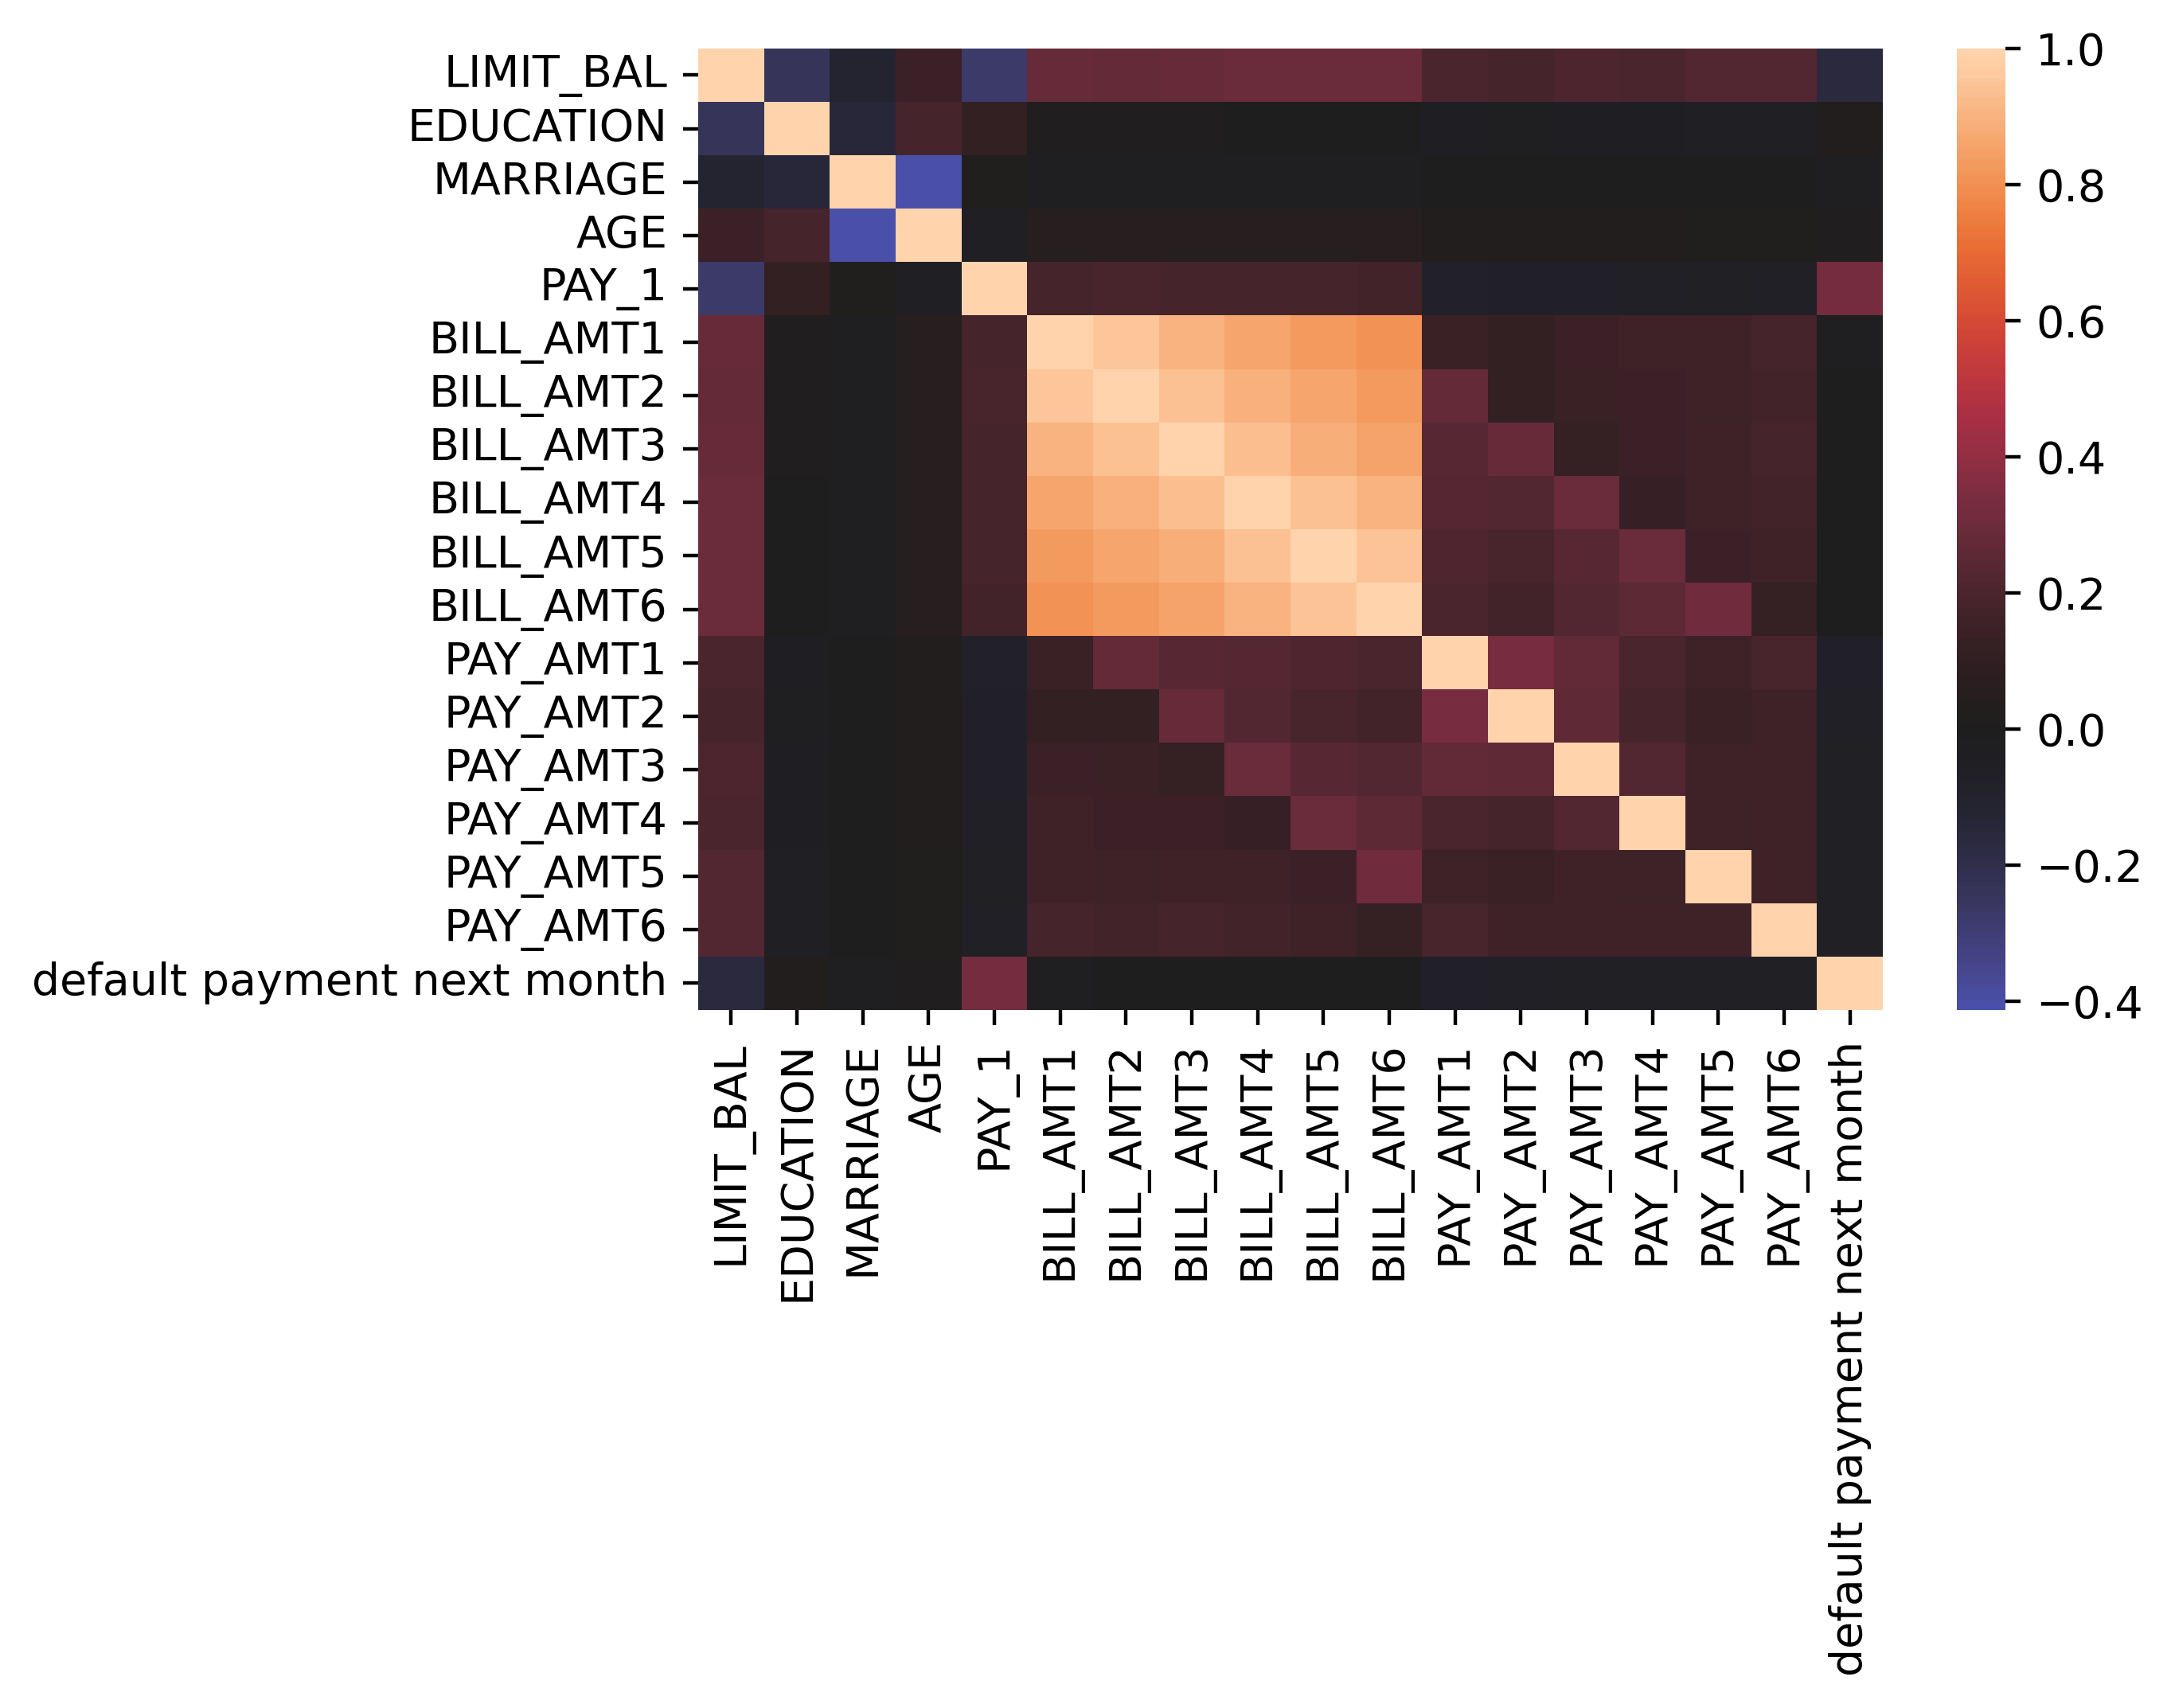

In [11]:
mpl.rcParams['figure.dpi'] = 400 #high res figures
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0)

In [12]:
n_points = 500
np.random.seed(seed=2)
X = np.random.uniform(low=0.0, high=10.0, size=(n_points,))
slope = 0.25
noise = 0.2
y=[]
y.append( slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( -slope * X + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )
y.append( np.sin(X/(2)*np.pi) + np.random.normal(loc=0.0, scale=noise, size=(n_points,)) )

In [13]:
np.corrcoef(X, y[3])

array([[1.        , 0.01900706],
       [0.01900706, 1.        ]])

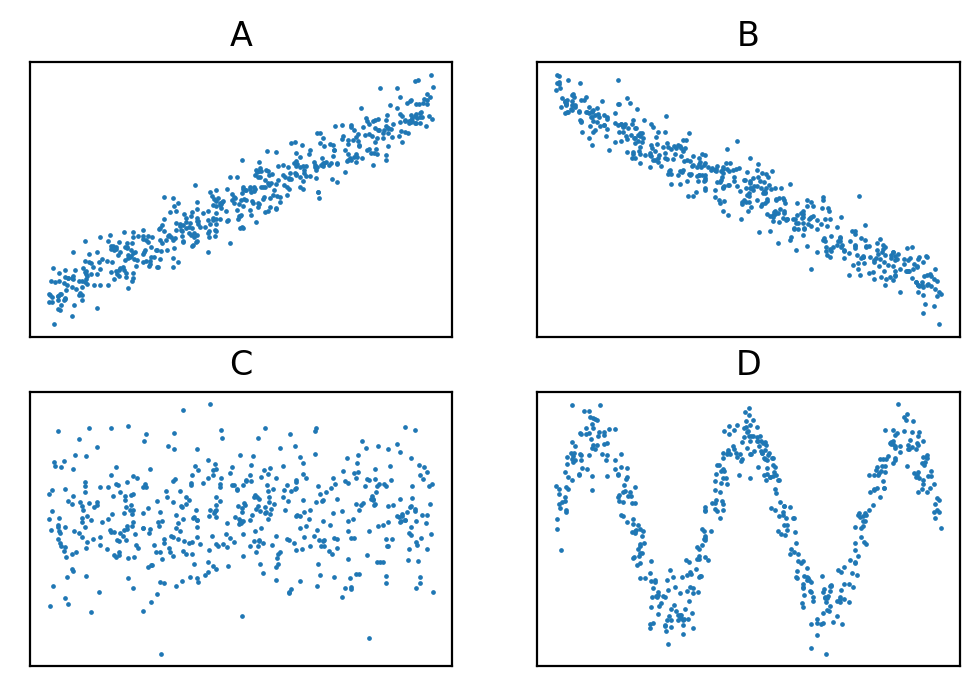

In [14]:
mpl.rcParams['figure.dpi'] = 200
fig_h, ax_h = plt.subplots(2,2)
counter = 0
correlations = []
titles = ['A', 'B', 'C', 'D']
for axis in ax_h.flatten():
    axis.scatter(X,y[counter],s=0.5)
    axis.set_xticks([])
    axis.set_yticks([])
    axis.set_title(titles[counter])
#     axis.set_title( r'$\rho = ${:0.2f}'.format(np.corrcoef(X, y[counter])[0,1]))
    correlations.append(np.corrcoef(X, y[counter])[0,1])
    counter+=1

In [15]:
correlations

[0.96375132764979,
 -0.9659993956705688,
 0.06339625904219298,
 0.019007055545229228]

# Exercise 11: F-test and Univariate Feature Selection

In [16]:
X = df[features_response].iloc[:,:-1].values
y = df[features_response].iloc[:,-1].values
print(X.shape, y.shape)

(26664, 17) (26664,)


In [17]:
from sklearn.feature_selection import f_classif

In [18]:
[f_stat, f_p_value] = f_classif(X, y)

In [19]:
f_test_df = pd.DataFrame({'Feature':features_response[:-1],
                          'F statistic':f_stat,
                          'p value':f_p_value})
f_test_df.sort_values('p value')

,Feature,F statistic,p value
4,PAY_1,3156.672300,0.000000e+00
0,LIMIT_BAL,651.324071,5.838366e-142
11,PAY_AMT1,140.612679,2.358354e-32
12,PAY_AMT2,101.408321,8.256124e-24
13,PAY_AMT3,90.023873,2.542641e-21
15,PAY_AMT5,85.843295,2.090120e-20
16,PAY_AMT6,80.420784,3.219565e-19
14,PAY_AMT4,79.640021,4.774112e-19
1,EDUCATION,32.637768,1.122175e-08
2,MARRIAGE,18.078027,2.127555e-05


In [20]:
from sklearn.feature_selection import SelectPercentile

In [21]:
selector = SelectPercentile(f_classif, percentile=20)

In [22]:
selector.fit(X, y)

SelectPercentile(percentile=20)

In [23]:
best_feature_ix = selector.get_support()
best_feature_ix

array([ True, False, False, False,  True, False, False, False, False,
       False, False,  True,  True, False, False, False, False])

In [24]:
features = features_response[:-1]

In [25]:
best_features = [features[counter]
                 for counter in range(len(features))
                 if best_feature_ix[counter]]

In [26]:
best_features

['LIMIT_BAL', 'PAY_1', 'PAY_AMT1', 'PAY_AMT2']